# RF



## Data Set 1

In [1]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd



# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.1 MB/s eta 0:00:00


In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)
import pandas as pd

# Load data from the new Google Drive link
file_id = "1pI2WC2uOQARK3ayA6H4c1Eu2IRqURXbR"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the data
df = pd.read_csv(download_url)

# Backup original DataFrame
df_backup = df.copy()

# Create datetime directly from differently named columns
df['Date'] = pd.to_datetime({
    'year': df['YEAR'],
    'month': df['MO'],
    'day': df['DY']
})

# Set Date as the index
df = df.set_index('Date')

# Drop unnecessary columns
df = df.drop(columns=["YEAR", "MO", "DY"])

# Display the DataFrame (optional in scripts)
print(df.head())

            WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin    WD_cos  AVG_TEMP  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939  0.898028      26.4   
2013-01-04        4.75  86.31     22.93   8.79  0.424199  0.905569      25.1   
2013-01-05        5.74  86.88     22.17   2.60  0.563526  0.826098      26.9   
2013-01-06        5.79  88.09     23.47   1.65  0.460200  0.887815      27.3   
2013-01-07        4.52  93.04     24.04  27.41  0.368125  0.929776      25.9   

            WS10M_lag2  SURF_PRESSSURE  MAX_TEMP  RH_lag1  WD_sin_lag1  \
Date                                                                     
2013-01-03        3.99           99.68     28.38    86.19     0.500000   
2013-01-04        4.25           99.65     27.58    86.26     0.439939   
2013-01-05        4.75           99.50     26.16    86.31     0.424199   
2013-01-06        5.74           99.47     27.75    86.88     0.56352

In [3]:
df.columns

Index(['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'WD_cos', 'AVG_TEMP',
       'WS10M_lag2', 'SURF_PRESSSURE', 'MAX_TEMP', 'RH_lag1', 'WD_sin_lag1',
       'WD_sin_lag2', 'SL_PRESSURE', 'PREC_lag1', 'WS10M'],
      dtype='object')

In [4]:

df.columns
df

,WS10M_lag1,RH,MIN_TEMP,PREC,WD_sin,WD_cos,AVG_TEMP,WS10M_lag2,SURF_PRESSSURE,MAX_TEMP,RH_lag1,WD_sin_lag1,WD_sin_lag2,SL_PRESSURE,PREC_lag1,WS10M
Date,,,,,,,,,,,,,,,,
2013-01-03,4.25,86.26,23.42,13.42,0.439939,0.898028,26.4,3.99,99.68,28.38,86.19,0.500000,0.600420,1011.0,1.09,4.75
2013-01-04,4.75,86.31,22.93,8.79,0.424199,0.905569,25.1,4.25,99.65,27.58,86.26,0.439939,0.500000,1010.1,13.42,5.74
2013-01-05,5.74,86.88,22.17,2.60,0.563526,0.826098,26.9,4.75,99.50,26.16,86.31,0.424199,0.439939,1007.5,8.79,5.79
2013-01-06,5.79,88.09,23.47,1.65,0.460200,0.887815,27.3,5.74,99.47,27.75,86.88,0.563526,0.424199,1008.2,2.60,4.52
2013-01-07,4.52,93.04,24.04,27.41,0.368125,0.929776,25.9,5.79,99.46,26.70,88.09,0.460200,0.563526,1009.2,1.65,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6.01,88.57,24.40,9.45,0.381070,0.924546,29.5,4.29,99.66,30.35,86.27,0.483282,0.697165,1011.0,3.50,6.43
2023-12-28,6.43,90.59,25.51,13.93,0.634731,0.772734,28.5,6.01,99.58,29.37,88.57,0.381070,0.483282,1010.9,9.45,3.93
2023-12-29,3.93,89.03,25.03,9.80,0.689620,0.724172,28.2,6.43,99.69,29.30,90.59,0.634731,0.381070,1011.4,13.93,2.59


## Data Sets

# 1

In [5]:

df

,WS10M_lag1,RH,MIN_TEMP,PREC,WD_sin,WD_cos,AVG_TEMP,WS10M_lag2,SURF_PRESSSURE,MAX_TEMP,RH_lag1,WD_sin_lag1,WD_sin_lag2,SL_PRESSURE,PREC_lag1,WS10M
Date,,,,,,,,,,,,,,,,
2013-01-03,4.25,86.26,23.42,13.42,0.439939,0.898028,26.4,3.99,99.68,28.38,86.19,0.500000,0.600420,1011.0,1.09,4.75
2013-01-04,4.75,86.31,22.93,8.79,0.424199,0.905569,25.1,4.25,99.65,27.58,86.26,0.439939,0.500000,1010.1,13.42,5.74
2013-01-05,5.74,86.88,22.17,2.60,0.563526,0.826098,26.9,4.75,99.50,26.16,86.31,0.424199,0.439939,1007.5,8.79,5.79
2013-01-06,5.79,88.09,23.47,1.65,0.460200,0.887815,27.3,5.74,99.47,27.75,86.88,0.563526,0.424199,1008.2,2.60,4.52
2013-01-07,4.52,93.04,24.04,27.41,0.368125,0.929776,25.9,5.79,99.46,26.70,88.09,0.460200,0.563526,1009.2,1.65,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,6.01,88.57,24.40,9.45,0.381070,0.924546,29.5,4.29,99.66,30.35,86.27,0.483282,0.697165,1011.0,3.50,6.43
2023-12-28,6.43,90.59,25.51,13.93,0.634731,0.772734,28.5,6.01,99.58,29.37,88.57,0.381070,0.483282,1010.9,9.45,3.93
2023-12-29,3.93,89.03,25.03,9.80,0.689620,0.724172,28.2,6.43,99.69,29.30,90.59,0.634731,0.381070,1011.4,13.93,2.59


In [6]:
###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)


In [7]:
# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]


In [8]:
numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
            WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin    WD_cos  AVG_TEMP  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939  0.898028      26.4   
2013-01-04        4.75  86.31     22.93   8.79  0.424199  0.905569      25.1   
2013-01-05        5.74  86.88     22.17   2.60  0.563526  0.826098      26.9   
2013-01-06        5.79  88.09     23.47   1.65  0.460200  0.887815      27.3   
2013-01-07        4.52  93.04     24.04  27.41  0.368125  0.929776      25.9   

            WS10M_lag2  SURF_PRESSSURE  MAX_TEMP  RH_lag1  WD_sin_lag1  \
Date                                                                     
2013-01-03        3.99           99.68     28.38    86.19     0.500000   
2013-01-04        4.25           99.65     27.58    86.26     0.439939   
2013-01-05        4.75           99.50     26.16    86.31     0.424199   
2013-01-06        5.74           99.47     27.75    86.88   

In [9]:
# Evaluation Function
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

In [10]:
# Evaluation Function
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2


# FNN

## Original


--- FNN Evaluation ---
Train (FNN): MSE = 0.1515, MAE = 0.2917, R² = 0.9399
Test (FNN): MSE = 0.6770, MAE = 0.6364, R² = 0.7193
            Actual  Predicted
Date                         
2021-10-20    2.82   3.385728
2021-10-21    2.79   2.761632
2021-10-22    2.72   1.647202
2021-10-23    4.30   2.687612
2021-10-24    3.74   3.889378
2021-10-25    2.69   3.091315
2021-10-26    2.37   2.714365
2021-10-27    2.30   2.680915
2021-10-28    3.50   2.968006
2021-10-29    4.15   3.825071
2021-10-30    1.97   3.196903
2021-10-31    5.60   1.343378
2021-11-01    6.11   5.665834
2021-11-02    2.57   3.896845
2021-11-03    3.27   2.368797
2021-11-04    3.36   3.273546
2021-11-05    3.55   3.505126
2021-11-06    4.03   3.448083
2021-11-07    5.18   3.930843
2021-11-08    5.81   4.951408


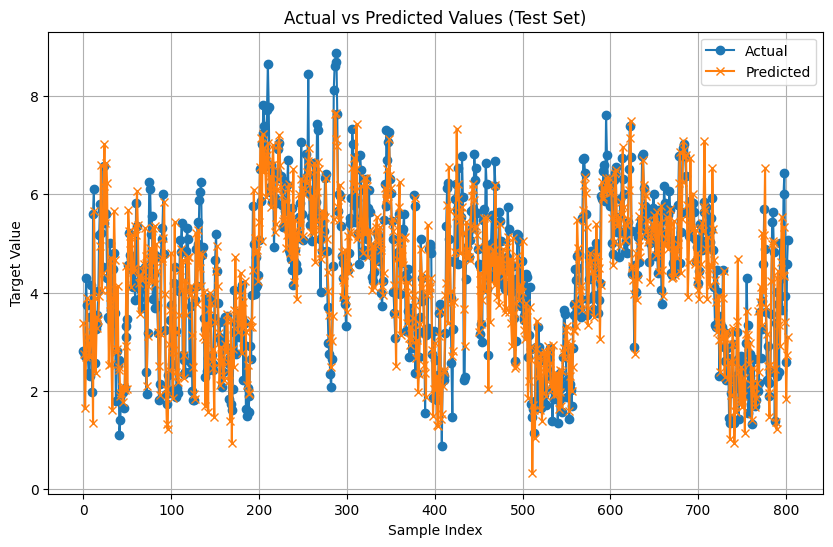

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set seed for reproducibility
RANDOM_SEED = 42




# ===== CRITICAL ADDITION: STANDARD SCALING =====
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Fit and transform train
X_test_sub = scaler.transform(X_test)




# Initialize FNN model
fnn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # You can modify this architecture
    activation='relu',             # relu is common, can try 'tanh' or 'logistic'
    solver='adam',                 # 'adam' is robust; 'lbfgs' is good for small data
    learning_rate='adaptive',
    max_iter=1000,
    random_state=RANDOM_SEED
)

# Fit the model
fnn_model.fit(X_train_sub, y_train)

# Predict on train and test
y_train_pred_fnn = fnn_model.predict(X_train_sub)
y_test_pred_fnn = fnn_model.predict(X_test_sub)

# === Evaluation Function ===
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label}: MSE = {mse:.4f}, MAE = {mae:.4f}, R² = {r2:.4f}")

# Evaluate FNN
print("\n--- FNN Evaluation ---")
evaluate(y_train, y_train_pred_fnn, label="Train (FNN)")
evaluate(y_test, y_test_pred_fnn, label="Test (FNN)")
# Create a DataFrame to compare actual and predicted values on test set
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_fnn
})

print(comparison_df.head(20))  # Show first 20 rows for exampleimport matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_test_pred_fnn, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

## Grid Search

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best Parameters found:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}

--- Optimized FNN Evaluation ---
Train (FNN Optimized) MSE: 0.3302
Train (FNN Optimized) RMSE: 0.5747
Train (FNN Optimized) MAE: 0.4483
Train (FNN Optimized) MAPE: 12.32%
Train (FNN Optimized) R²: 0.8689
Test (FNN Optimized) MSE: 0.5166
Test (FNN Optimized) RMSE: 0.7187
Test (FNN Optimized) MAE: 0.5542
Test (FNN Optimized) MAPE: 15.01%
Test (FNN Optimized) R²: 0.7858


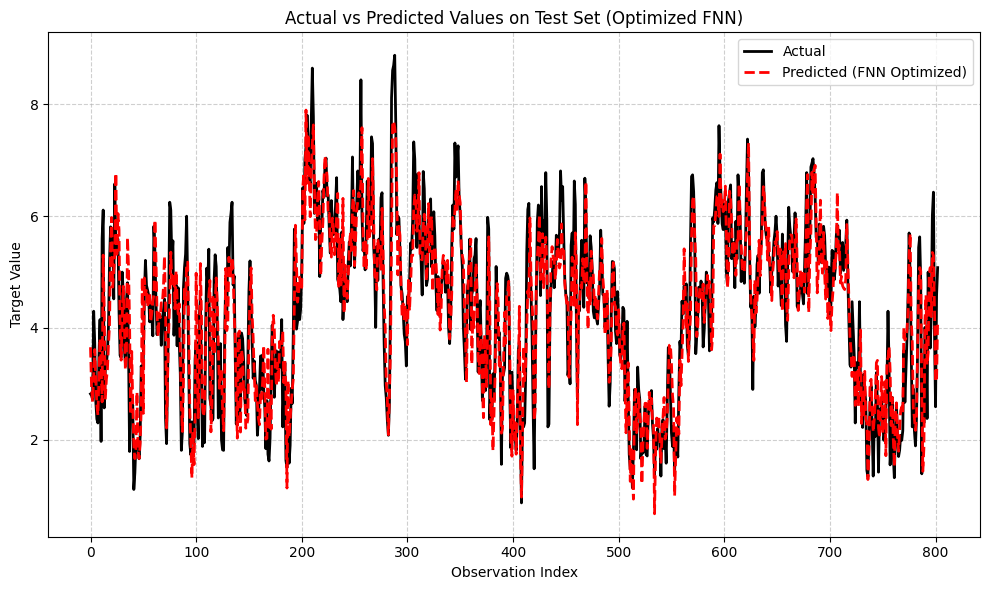

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Set reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)


# ===== CRITICAL ADDITION: STANDARD SCALING =====
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Fit and transform train
X_test_sub = scaler.transform(X_test)


# Evaluation function (same as yours)
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Define parameter grid for MLPRegressor
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization)
    'max_iter': [500, 1000]
}

# Initialize model (base, parameters will be tuned by grid)
fnn = MLPRegressor(random_state=RANDOM_SEED)

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=fnn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train_sub, y_train)

# Best model after grid search
best_fnn = grid_search.best_estimator_

print("\nBest Parameters found:")
print(grid_search.best_params_)

# Predictions
y_train_pred_fnn_opt = best_fnn.predict(X_train_sub)
y_test_pred_fnn_opt = best_fnn.predict(X_test_sub)

# Evaluation
print("\n--- Optimized FNN Evaluation ---")
evaluate_metrics(y_train, y_train_pred_fnn_opt, label="Train (FNN Optimized)")
evaluate_metrics(y_test, y_test_pred_fnn_opt, label="Test (FNN Optimized)")

# Plot actual vs predicted on test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_fnn_opt, label='Predicted (FNN Optimized)', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized FNN)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Random Search

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters:
{'activation': 'relu', 'alpha': np.float64(0.005308342600258237), 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}

--- Optimized FNN Evaluation ---
Train (FNN Optimized) MSE: 0.3311
Train (FNN Optimized) RMSE: 0.5754
Train (FNN Optimized) MAE: 0.4488
Train (FNN Optimized) MAPE: 12.32%
Train (FNN Optimized) R²: 0.8686
Test (FNN Optimized) MSE: 0.5145
Test (FNN Optimized) RMSE: 0.7173
Test (FNN Optimized) MAE: 0.5537
Test (FNN Optimized) MAPE: 14.99%
Test (FNN Optimized) R²: 0.7866


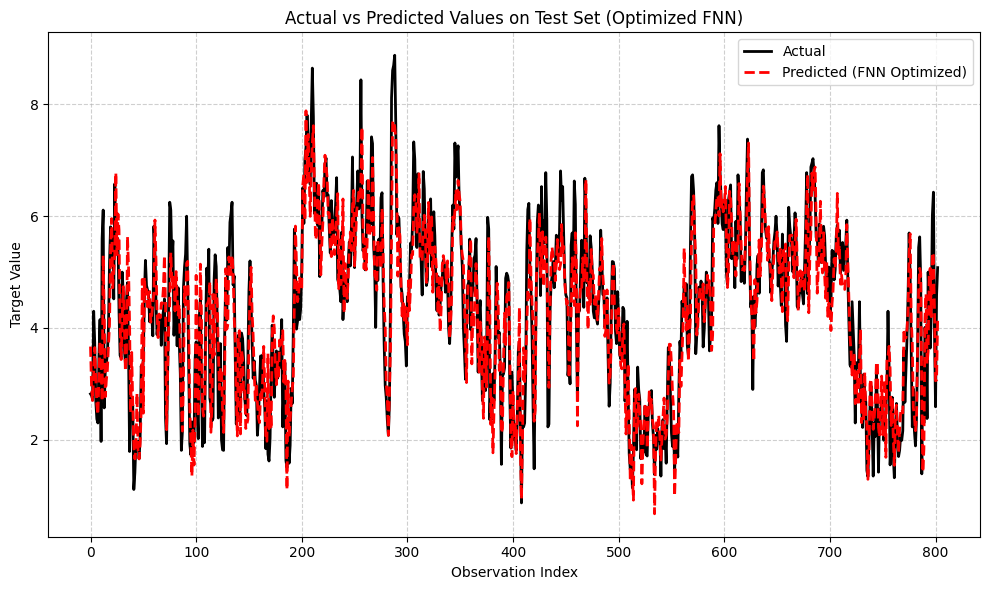

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from scipy.stats import uniform
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
# ===== CRITICAL ADDITION: STANDARD SCALING =====
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Fit and transform train
X_test_sub = scaler.transform(X_test)


# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Evaluation function (same as SVR)
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Hyperparameter distributions for MLPRegressor
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': uniform(loc=0.0001, scale=0.01),  # L2 penalty (regularization)
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000]
}

# Initialize model
fnn = MLPRegressor(random_state=RANDOM_SEED)

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=fnn,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=2,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train_sub, y_train)

# Best model
best_fnn = random_search.best_estimator_
print("\nBest Parameters:")
print(random_search.best_params_)

# Predictions
y_train_pred_fnn_opt = best_fnn.predict(X_train_sub)
y_test_pred_fnn_opt = best_fnn.predict(X_test_sub)

# Evaluation
print("\n--- Optimized FNN Evaluation ---")
evaluate_metrics(y_train, y_train_pred_fnn_opt, label="Train (FNN Optimized)")
evaluate_metrics(y_test, y_test_pred_fnn_opt, label="Test (FNN Optimized)")

# Plot actual vs predicted values on test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred_fnn_opt, label='Predicted (FNN Optimized)', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized FNN)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: Permutation Feature Importance (approximate for FNN)
perm_result = permutation_importance(
    best_fnn,
    X_test_sub,
    y_test,
    n_repeats=10,
    random_state=RANDOM_SEED,
    scoring='neg_mean_squared_error'
)

importance_df = pd.DataFrame({
    'Feature': X_test_sub.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='crimson')
plt.xlabel('Permutation Importance Score')
plt.title('FNN: Permutation Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


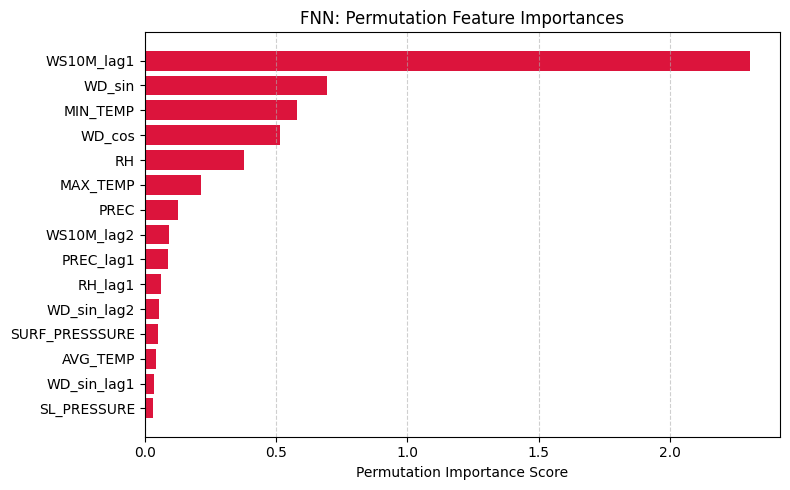

In [14]:

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='crimson')
plt.xlabel('Permutation Importance Score')
plt.title('FNN: Permutation Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## optuna

[I 2025-07-23 05:52:14,465] A new study created in memory with name: no-name-a7d4ba7e-8506-4cef-a401-b8d1767629c7
[I 2025-07-23 05:52:27,845] Trial 0 finished with value: 0.8374918958912725 and parameters: {'n_layers': 2, 'n_units_l0': 144, 'n_units_l1': 115, 'activation': 'relu', 'alpha': 2.9375384576328295e-05, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.8374918958912725.
[I 2025-07-23 05:52:34,325] Trial 1 finished with value: 0.7945063007892933 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 22, 'activation': 'relu', 'alpha': 4.335281794951564e-05, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 0.7945063007892933.
[I 2025-07-23 05:52:38,663] Trial 2 finished with value: 0.8640552072542335 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'activation': 'relu', 'alpha': 0.000684792009557478, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 0.7945063007892933.
[I 2025-07-23 05:53:02,249] Trial 3 finished with value: 0.83071247593907


Best Trial:
FrozenTrial(number=11, state=1, values=[0.7906150437250182], datetime_start=datetime.datetime(2025, 7, 23, 5, 54, 14, 609655), datetime_complete=datetime.datetime(2025, 7, 23, 5, 54, 50, 61791), params={'n_layers': 2, 'n_units_l0': 116, 'n_units_l1': 144, 'activation': 'tanh', 'alpha': 0.00034483774505724996, 'learning_rate': 'adaptive'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_layers': IntDistribution(high=3, log=False, low=1, step=1), 'n_units_l0': IntDistribution(high=150, log=False, low=20, step=1), 'n_units_l1': IntDistribution(high=150, log=False, low=20, step=1), 'activation': CategoricalDistribution(choices=('relu', 'tanh')), 'alpha': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'learning_rate': CategoricalDistribution(choices=('constant', 'adaptive'))}, trial_id=11, value=None)

Best Parameters:
{'n_layers': 2, 'n_units_l0': 116, 'n_units_l1': 144, 'activation': 'tanh', 'alpha': 0.00034483774505724996, 'learning_r

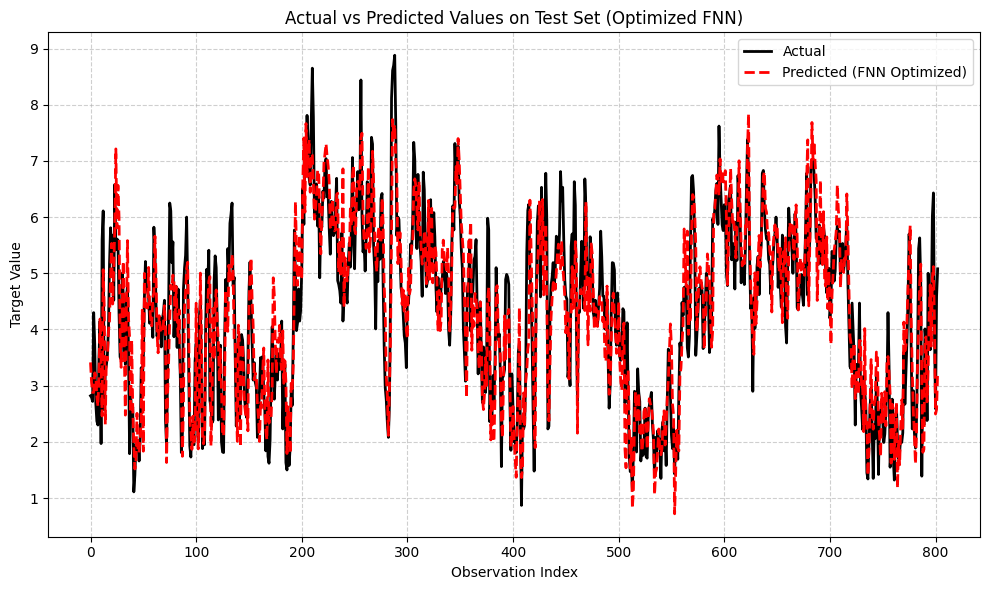

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [16]:
import optuna
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


# ===== CRITICAL ADDITION: STANDARD SCALING =====
scaler = StandardScaler()
X_train_sub = scaler.fit_transform(X_train)  # Fit and transform train
X_test_sub = scaler.transform(X_test)


# Reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Evaluation function (same as before)
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Optuna objective function for MLPRegressor (FNN)
def fnn_objective(trial):
    # Suggested hyperparameters for MLP
    hidden_layer_sizes = []
    n_layers = trial.suggest_int('n_layers', 1, 3)
    for i in range(n_layers):
        units = trial.suggest_int(f'n_units_l{i}', 20, 150)
        hidden_layer_sizes.append(units)
    hidden_layer_sizes = tuple(hidden_layer_sizes)

    params = {
        'hidden_layer_sizes': hidden_layer_sizes,
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh']),
        'solver': 'adam',  # fixed
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-2),  # L2 regularization
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),
        'max_iter': 1000,
        'random_state': RANDOM_SEED
    }

    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_idx, val_idx in tscv.split(X_train_sub):
        X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = MLPRegressor(**params)
        model.fit(X_t, y_t)
        preds = model.predict(X_v)
        rmse = mean_squared_error(y_v, preds)
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Create Optuna study
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
study.optimize(fnn_objective, n_trials=30, timeout=600)  # max 10 min or 30 trials

print("\nBest Trial:")
print(study.best_trial)
print("\nBest Parameters:")
print(study.best_params)

# Refit final model with best params on full train data
best_params = study.best_params

# Build hidden_layer_sizes tuple
hidden_layer_sizes = tuple(
    best_params[f'n_units_l{i}'] for i in range(best_params['n_layers'])
)

final_model = MLPRegressor(
    hidden_layer_sizes=hidden_layer_sizes,
    activation=best_params['activation'],
    solver='adam',
    alpha=best_params['alpha'],
    learning_rate=best_params['learning_rate'],
    max_iter=1000,
    random_state=RANDOM_SEED
)

final_model.fit(X_train_sub, y_train)

# Predictions
y_train_pred = final_model.predict(X_train_sub)
y_test_pred = final_model.predict(X_test_sub)

# Evaluate
print("\n--- Optimized FNN Evaluation ---")
evaluate_metrics(y_train, y_train_pred, label="Train (FNN Optimized)")
evaluate_metrics(y_test, y_test_pred, label="Test (FNN Optimized)")

# Plot actual vs predicted values on test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (FNN Optimized)', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized FNN)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Permutation importance for FNN
perm_result = permutation_importance(
    final_model,
    X_test_sub,
    y_test,
    n_repeats=10,
    random_state=RANDOM_SEED,
    scoring='neg_mean_squared_error'
)

importance_df = pd.DataFrame({
    'Feature': X_test_sub.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='coral')
plt.xlabel('Permutation Importance Score')
plt.title('FNN: Permutation Feature Importances (Optuna Optimized)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


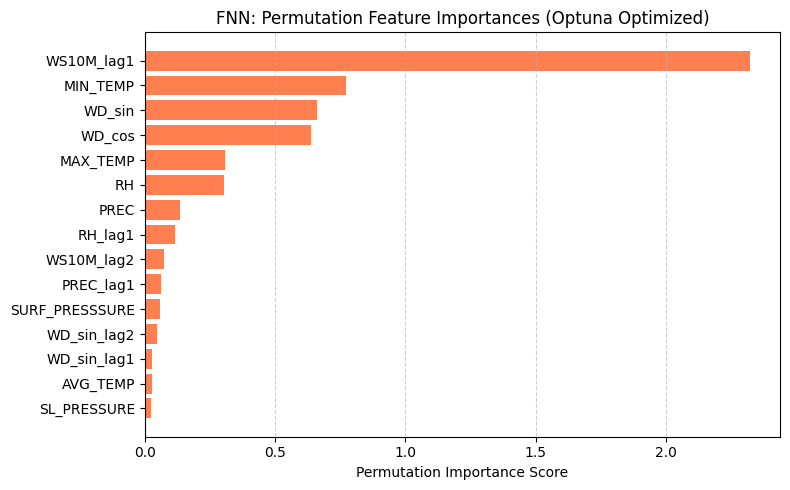

In [17]:
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='coral')
plt.xlabel('Permutation Importance Score')
plt.title('FNN: Permutation Feature Importances (Optuna Optimized)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

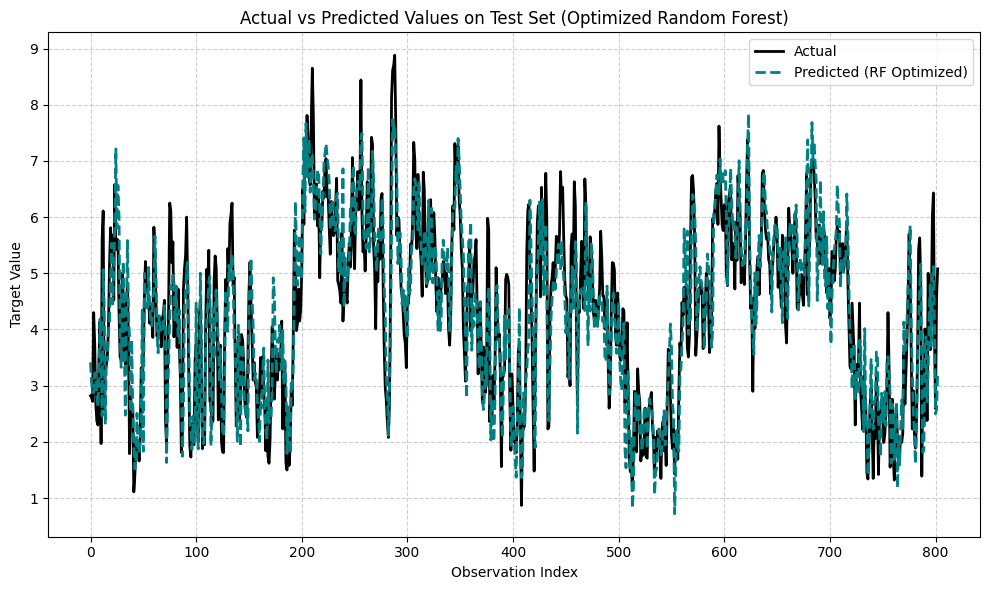

In [19]:
# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (RF Optimized)', color='teal', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized Random Forest)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
